<a href="https://colab.research.google.com/github/1man1/2020-11-study/blob/main/Unit_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline  
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False#마이너스 기호 나오게

NanumGothic Eco


In [ ]:
plt.rc('font', family=font_name)

NameError: ignored

In [ ]:
import csv
 
f = open('age.csv',encoding='cp949')
data = csv.reader(f)
result = []
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')  # ➊
 
for row in data :
    if name in row[0] :                   # ➋
        for i in row[3:] :
            result.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')                   # ➌
plt.rc('font', family=font_name)          # ➍
plt.title(name +' 지역의 인구 구조')      # ➎
plt.plot(result)
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 관양동


NameError: ignored

■ bar( ) 함수

bar() 함수는 막대그래프를 표현하는 명령어입니다. 막대그래프에서 막대의 길이는 각 데이터의 크기를 의미합니다.

다음은 간단한 막대그래프의 예시 코드입니다.

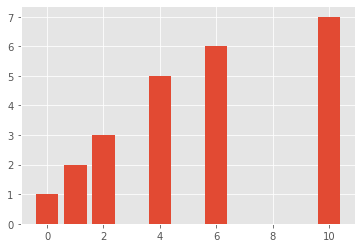

In [ ]:
import matplotlib.pyplot as plt
plt.bar([0, 1, 2, 4, 6, 10], [1, 2, 3, 5, 6, 7])
plt.show()

TIP

그래프의 색을 포함하여 세부적인 속성은 실행 환경에 따라 다를 수도 있습니다.

bar() 함수에는 두 가지 값이 입력됩니다. 첫 번째는 막대를 표시할 위치이고, 두 번째는 막대의 높이입니다. 그리고 이 두 종류의 값들은 개수가 일치해야 합니다.
예를 들어, 이 코드처럼 bar([0, 1, 2, 4, 6, 10], [1, 2, 3, 5, 6, 7])를 실행할 경우, 0에 해당하는 위치의 막대 높이는 1이고, 10에 해당하는 위치의 막대 높이는 7인 그래프가 그려집니다.
막대그래프의 위치를 오름차순으로 표현하는 경우가 많으므로, 다음과 같이 range() 함수를 사용하여 막대그래프의 위치를 표현할 수도 있습니다.

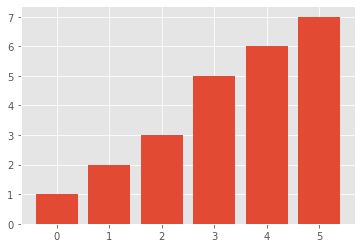

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(6), [1, 2, 3, 5, 6, 7])
plt.show()

이제 우리 동네의 인구 구조를 막대 그래프로 표현해 봅시다. 다음 코드를 참고하여, 자신이 사는 동네의 이름을 넣어 코드를 작성하면 쉽게 결과를 확인할 수 있습니다. 여기에서는 ‘신도림’을 넣었습니다. 또한, 0~100세 이상까지 101개 구간이 있기 때문에 막대의 위치를 range(101)라고 설정하였습니다.

TIP

‘신도림’이 아닌 다른 동네의 결과를 보려면, ‘신도림’이라고 작성된 부분의 코드 한 줄만 수정하면 됩니다. 데이터를 처리하는 부분의 코드는 동일합니다.

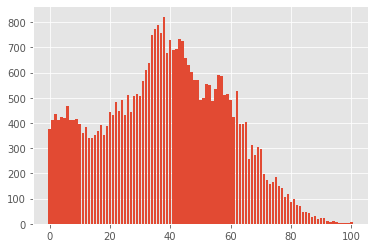

In [ ]:
import csv
f = open('age.csv',encoding='cp949')
data = csv.reader(f)

result = []
for row in data :
    if '신도림' in row[0] :
        for i in row[3:] :
            result.append(int(i))

import matplotlib.pyplot as plt
plt.bar(range(101), result)
plt.show()

■ barh( ) 함수

막대그래프를 수직이 아닌 수평 방향으로 그릴 수도 있습니다. bar() 함수를 barh() 함수로 바꾸면 수평 막대그래프로 표현됩니다.

<BarContainer object of 101 artists>

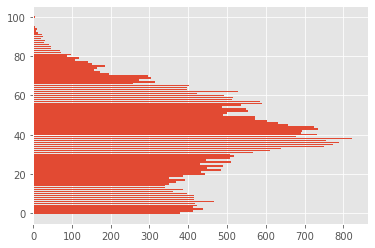

In [ ]:
plt.barh(range(101),result)

barh(range(101), result)에서 range(101)은 y축의 막대 위치가 되고 result는 막대의 너비가 됩니다.

2 항아리 모양 그래프 그리기

현재 우리가 가진 데이터는 성별에 따라 구분되어 있지 않습니다. 하지만 항아리 모양으로 그래프를 그리려면 성별 정보가 포함된 인구 구조 데이터가 무척 유용할 것 같습니다.

■ 데이터 수집하기

Unit 7에서 데이터를 내려받았던 것 기억하나요? 같은 방법으로 이번에는 남녀 성별이 포함된 데이터를 내려받겠습니다.

➊ 행정안전부 홈페이지(www.mois.go.kr)의 정책자료 → 통계 → 주민등록 인구통계 메뉴에 접속한 후 연령별 인구현황 메뉴에서 통계표 탭을 선택합니다. ‘구분’에서 계 선택을 해제하고 남·여 구분에 선택합니다. ‘연령 구분 단위’를 1세로 선택하고 ‘만 연령구분’은 0에서 100이상을 선택한 다음 검색 버튼을 클릭합니다.

남성 데이터에 이어서 여성 데이터가 나옴

 

그러면 여기에서 남성 데이터와 여성 데이터를 각각 따로 저장할 수 있을까요? 몇 가지 아이디어를 생각해 보겠습니다. 첫 번째 아이디어는 다음과 같습니다.
남성 데이터는 왼쪽에, 여성 데이터는 오른쪽에 있으므로, 앞에서 3번째(0부터 시작한다고 가정)에 있는 데이터는 남성 0세 인구수이고, 뒤에서 첫 번째 데이터(인덱스 -1)는 여성의 100세 이상 인구수입니다.

남성 데이터는 맨 앞에서부터 리스트 m에 차례대로 저장하면 됩니다. 여성 데이터는 인덱스 값이 -1인 100세 이상 인구수부터, 즉 맨 뒤에서부터 -1, -2, -3… 순으로 리스트 f에 저장한 후, 저장된 여성 데이터를 다시 역순으로 뒤집으면 됩니다.

이때 남성 데이터는 인덱스가 3에서 시작하고, 여성 데이터는 인덱스가 –1에서 시작된다는 점을 주의해야 합니다.

이 패턴을 코드로 표현하면 다음과 같습니다.

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
for row in data :
    if '신도림' in row[0] :
        for i in range(0,101) :
            m.append(int(row[i+3]))
            f.append(int(row[-(i+1)]))
f.reverse()

TIP

reverse( ) 함수는 리스트의 값을 역순으로 재배열하는 함수입니다.

남성 데이터는 3번 인덱스 값부터 103번 인덱스 값까지 차례대로 리스트 m에 저장하고, 여성 데이터는 106번 인덱스 값부터 206번 인덱스 값까지 차례대로 리스트 f에 저장할 수 있습니다.

이를 코드로 표현하면 다음과 같습니다. 남성(male) 데이터는 리스트 m에 저장하고(➊),여성(female) 데이터는 리스트 f에 저장합니다(➋).

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
for row in data :
    if'신도림'in row[0] :
        for i in row[3:104] :
            m.append(int(i))    # ➊ 남성 데이터를 리스트 m에 저장
        for i in row[106:] :
            f.append(int(i))    # ➋ 여성 데이터를 리스트 f에 저장

TIP

남성 데이터와 여성 데이터를 저장하는 코드(➊ ~ ➋)는 다양한 형태로 표현할 수 있습니다. 예를 들어 10행은 for in row[106:207]로 표현할 수도 있습니다. 여성 인구 데이터 중 0세에 해당하는 106번 인덱스부터 100세 이상에 해당하는 206번 인덱스까지를 범위로 지정해 주는 것이지요. 이 책에서 설명하는 코드 외에 여러분이 생각하는 방법으로 코드를 작성해 보세요.

여러분은 위의 두 가지 방법 중 어떤 방법이 더 편한가요? 아니면 이 두 가지 방법보다 더 좋은 방법이 떠올랐나요? 이 책에서는 순서대로 데이터를 저장하는 두 번째 방법을 선택해서 항아리 모양 그래프를 그려보겠습니다.

■ 데이터 시각화하기

앞의 코드에 다음 코드를 추가합니다. m과 f 데이터를 각각 수평 막대그래프로 표현하는 코드입니다.

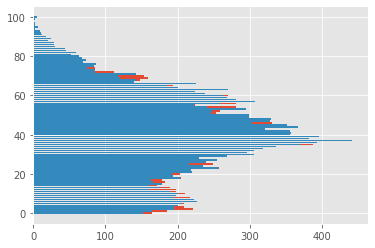

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(101), m)
plt.barh(range(101), f)
plt.show()

이는 두 데이터가 모두 양수로 이루어져 있기 때문입니다. 남성 데이터를 왼쪽에, 여성 데이터를 오른쪽에 두려면 남성 데이터를 음수로 바꾸면 되겠지요.

다음과 같이 코드를 조금 수정합니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

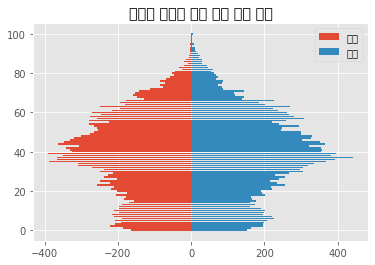

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
for row in data :
    if'신도림'in row[0] :
        for i in row[3:104] :
            m.append(-int(i))    # ➊ 남성 데이터를 리스트 m에 저장
        for i in row[106:] :
            f.append(int(i))    # ➋ 여성 데이터를 리스트 f에 저장

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title('신도림 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.show()

이제 항아리 모양 그래프의 형태를 갖추었습니다. 그런데 남성 인구 그래프를 자세히 보니 마이너스 기호(-)가 깨졌네요. 이는 Unit 5에서 보았던 한글 서체 문제로, 다음과 같이 한 줄을 추가하면 해결됩니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

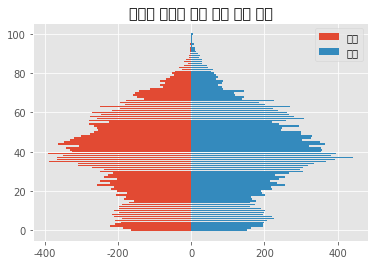

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('신도림 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.show()

지금까지 신도림 지역의 남녀 성별 인구 분포를 항아리 모양으로 나타냈습니다. 마지막으로 원하는 지역의 이름을 입력하면 해당 지역의 항아리 모양 그래프를 그리도록 코드를 수정하겠습니다.

if '신도림' in row[0] : 코드에서 '신도림'이라고 작성한 부분에 원하는 지역의 이름을 사용자에게 입력받을 수 있도록 수정하면 됩니다. 그리고 원하는 지역의 이름은 계속 바뀌므로 변수를 사용하면 됩니다.

우리 동네 인구 구조를 항아리 모양 그래프로 그리기

찾고 싶은 지역의 이름을 알려주세요 : 안양


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

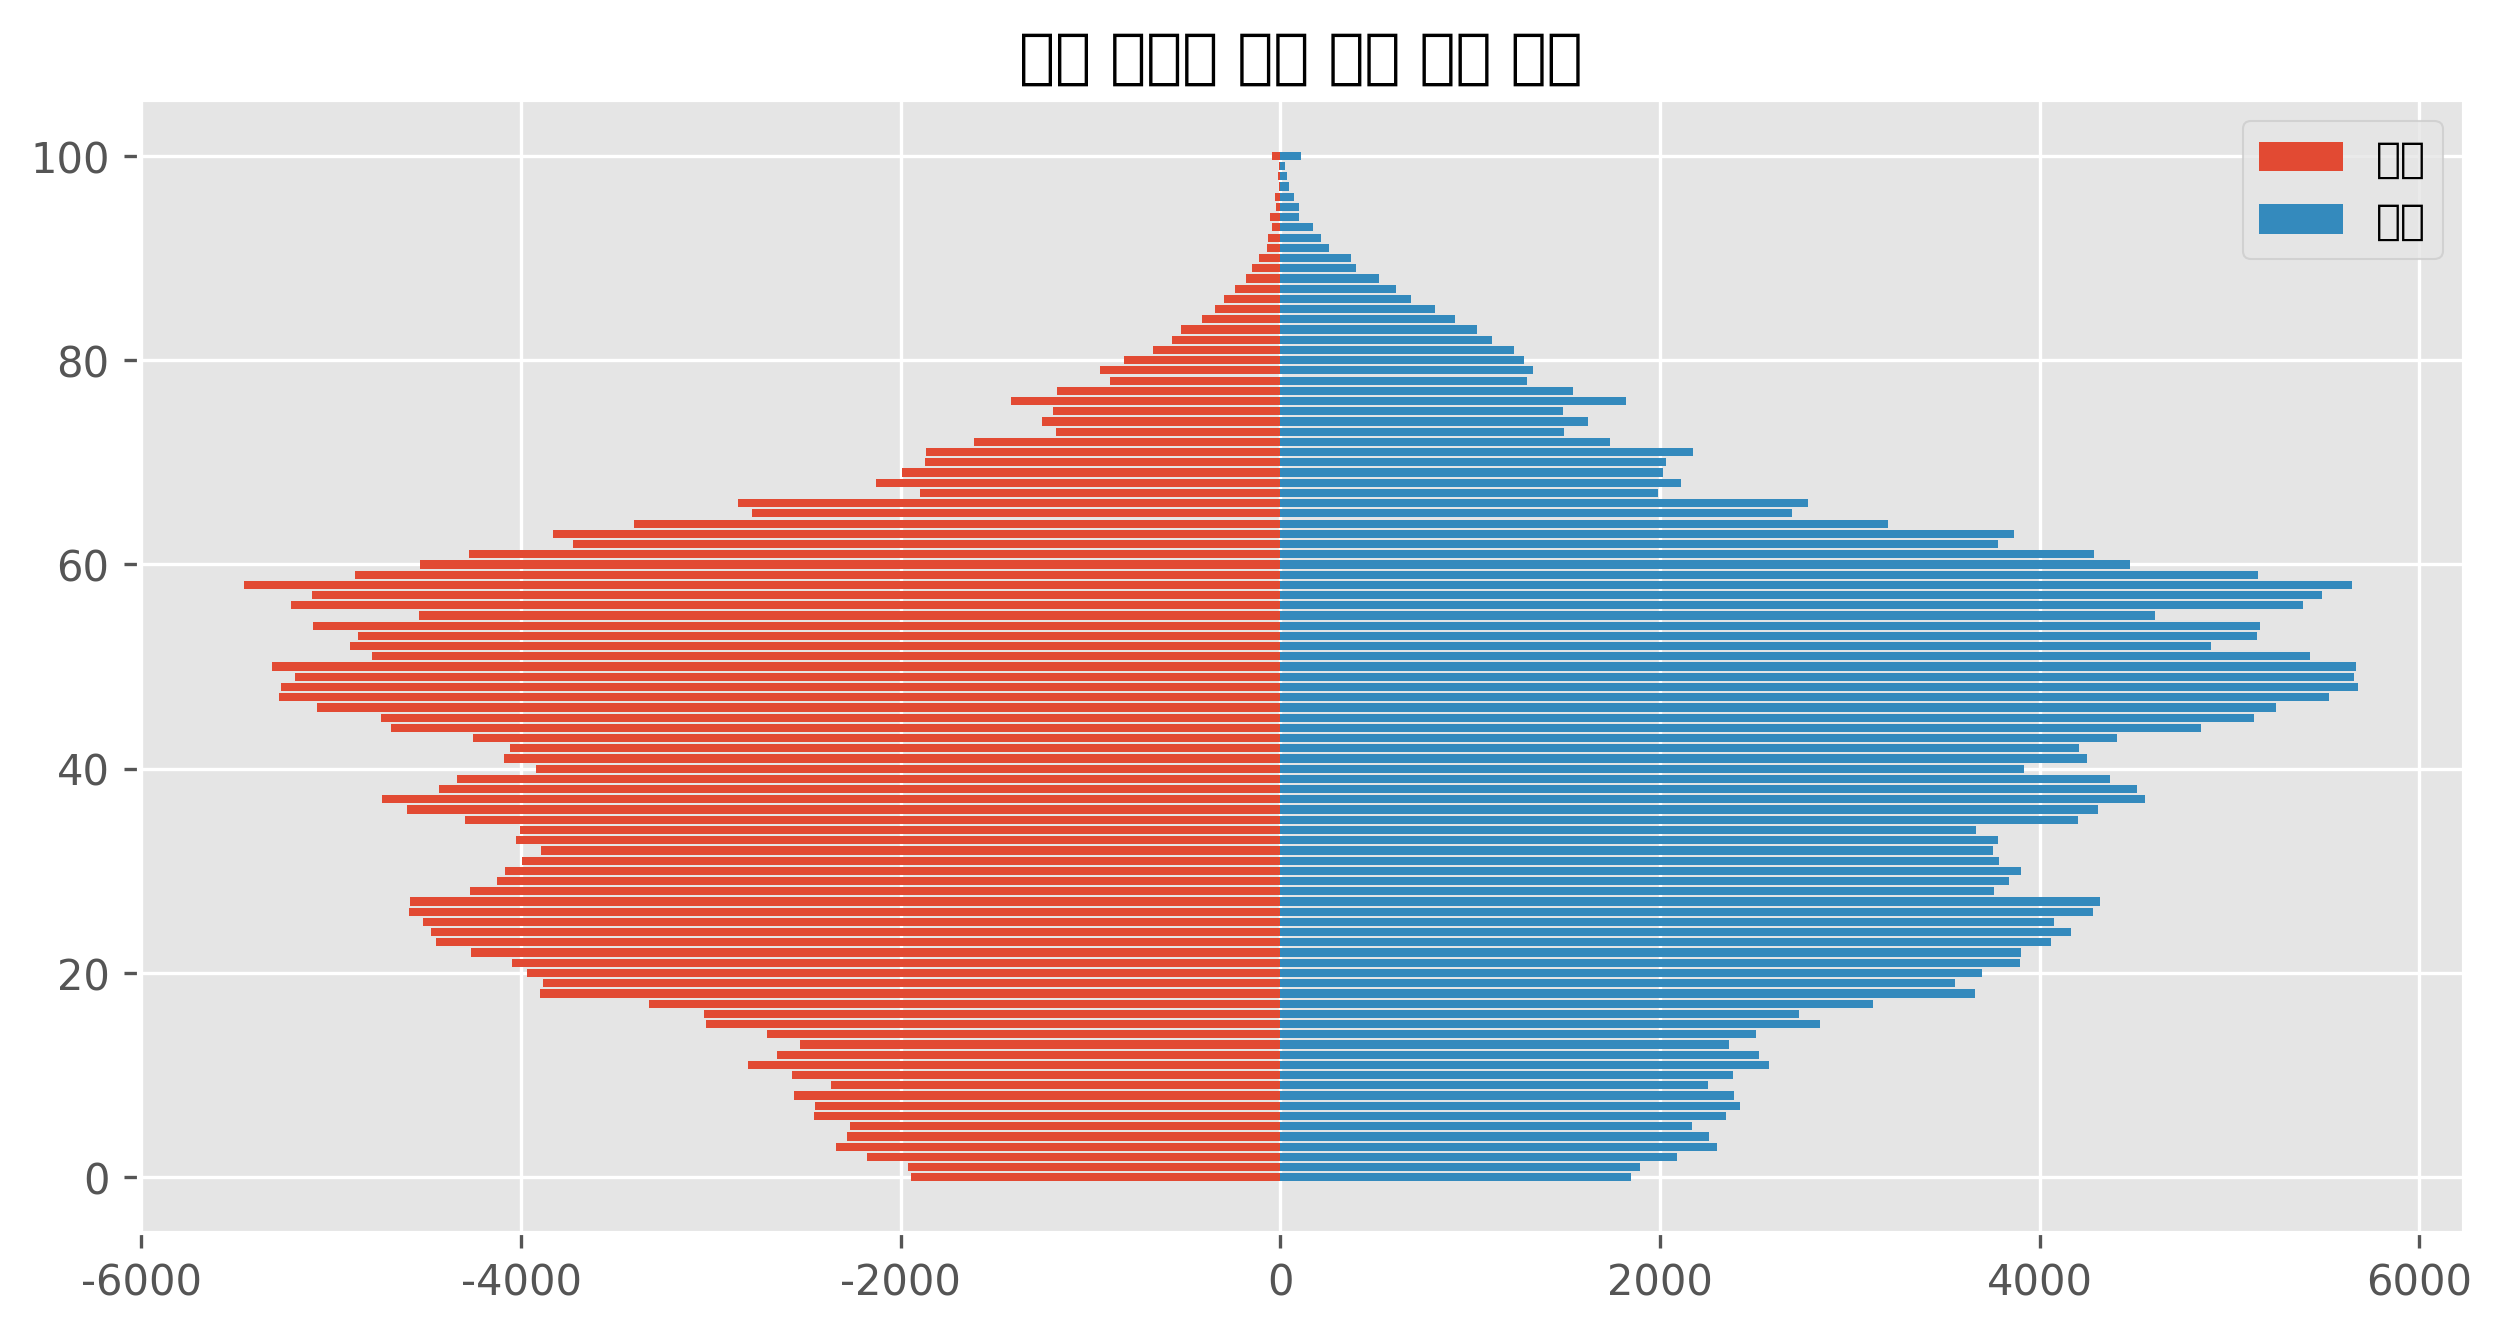

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)

m = []
f = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        for i in row[3:104] :
            m.append(-int(i))
        for i in row[106:] :
            f.append(int(i))
        break

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title(name+' 지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, label='남성')
plt.barh(range(101), f, label='여성')
plt.legend()
plt.show()

이번 시간에는 막대그래프와 수평 막대그래프로 인구 데이터를 표현했습니다. 다양한 형태의 그래프를 통해 인구 데이터에 숨어있던 새로운 의미를 찾았기를 바랍니다. 다음 시간에는 또 다른 형태로 인구 데이터를 표현하는 방법을 배워보겠습니다.